## Exploring Early Stopping Strategies

In this notebook, we will demonstrate how you can utilize the StoppingSimulator class to test the performance of various early stopping strategies on iterative learners through a simulated training process conducted on cached learning curves.

### Basic Run

In [7]:
""" Initialize StoppingSimulator Object """

from early_stopping.simulator import StoppingSimulator

# small number of curves for fast 'toy' run
path = "../data/eucalyptus/0"

simulator = StoppingSimulator(
    search_method="grid",  # can be one of ["grid", "random"]
    path=path,
    # verbosity=4,
)

Now that we have initialized our simulator object, we can run simulations on various stopping strategies. The next cell generates a list of currently supported strategies and their parameters.

In [8]:
# learn what stopping strategies are available
# and what parameters they accept
simulator.factory.help()

Supported Strategies:

simple_patience: SimplePatienceStrategy
Valid parameters: {'max_patience', 'n_iter', 'sliding_window', 'min_delta', 'min_patience', 'b'}

linear_patience: LinearPatienceStrategy
Valid parameters: {'max_patience', 'n_iter', 'a', 'sliding_window', 'min_delta', 'min_patience', 'b'}

polynomial_patience: PolynomialPatienceStrategy
Valid parameters: {'max_patience', 'n_iter', 'a', 'sliding_window', 'degree', 'min_delta', 'min_patience', 'b'}

feature_patience: FeaturePatienceStrategy
Valid parameters: {'num_rows_train', 'min_offset', 'max_patience', 'n_iter', 'min_rows', 'max_offset', 'a', 'sliding_window', 'degree', 'min_delta', 'min_patience', 'b'}

autogluon_patience: AutoGluonStrategy
Valid parameters: {'num_rows_train', 'min_offset', 'max_patience', 'n_iter', 'min_rows', 'max_offset', 'a', 'sliding_window', 'degree', 'min_delta', 'min_patience', 'b'}

fixed_iteration: FixedIterationStrategy
Valid parameters: {'n_iter'}

min_delta: MinDeltaStrategy
Valid parameter

In [9]:
""" Define some parameter ranges """

a = {"a": (0, 0.5, 0.05)}
b = {"b": (0, 50, 5)}
d = {"degree": (0.6, 1.3, 0.05)}
sw = {"sliding_window": (1, 7, 1)}
md = {"min_delta": (0, 0.01, 0.001)}
i = {"n_iter": (0, 1000, 50)}
minp = {"min_patience": (0, 100, 20)}
maxp = {"max_patience": (200, 600, 20)}

In [10]:
""" Run the Simulator and rank strategies """

simulator.rank(
    mode="ray", # control mode, set to "seq" to run sequentially (enables debugging)
    # filter learning curves by...
    # eval_sets=["val", "test"],
    # metrics=["accuracy"],
    # models=["LightGBM"],
    strategies={
        "autogluon_patience": {}, # early stopping strategy used in autogluon tabular
        "simple_patience": b,
        "linear_patience": a | b,
        "polynomial_patience": a | b | d,  # | maxp | minp
        "feature_patience": a | b | d,  # | maxp | minp
        # add more (see simulator.factory.help() output)
    },
)
simulator.getRanks("val")

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:16<00:00, 16.08s/it]


,rank,strategy,params
0,1320.5,polynomial_patience,"{'a': 0.05, 'b': 5, 'degree': 0.7500000000000001}"
1,1320.5,polynomial_patience,"{'a': 0.05, 'b': 5, 'degree': 0.8000000000000002}"
2,1320.5,polynomial_patience,"{'a': 0.05, 'b': 5, 'degree': 0.8500000000000002}"
3,1320.5,polynomial_patience,"{'a': 0.05, 'b': 5, 'degree': 0.9000000000000002}"
4,1320.5,linear_patience,"{'a': 0.0, 'b': 5}"
...,...,...,...
4000,3419.5,polynomial_patience,"{'a': 0.0, 'b': 0, 'degree': 0.9500000000000003}"
4001,3419.5,polynomial_patience,"{'a': 0.0, 'b': 0, 'degree': 0.9000000000000002}"
4002,3419.5,polynomial_patience,"{'a': 0.0, 'b': 0, 'degree': 0.8500000000000002}"
4003,3419.5,polynomial_patience,"{'a': 0.0, 'b': 0, 'degree': 0.8000000000000002}"


### Visualizations

You can visualize the relationship between various parameters and their effective rankings via the Visualizations class. Currently, it supports visualizing strategies with up to three parameters, but works best for one and two.

In [12]:
# This was run with the follwing data (not publicly available)
# path = "../curves/3"

a = {"a": (0, 0.5, 0.05)}
b = {"b": (0, 250, 5)}

experiment = StoppingSimulator(search_method="grid")
experiment.load_curves(path)
ranks = experiment.rank(strategies={
    "simple_patience": b,
    "linear_patience": a | b
})

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


In [13]:
""" Create Visualizations object with the stopping simulator results """

from early_stopping.visualizer import Visualizations

vistool = Visualizations(simulator=experiment)

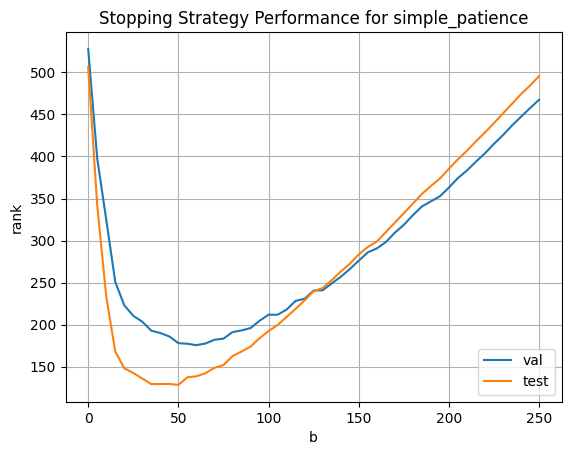

In [14]:
vistool.plot_strategy(strategy="simple_patience")

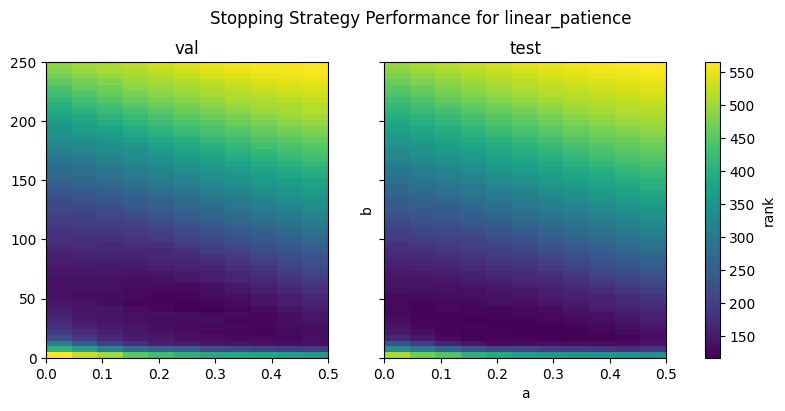

In [15]:
vistool.plot_strategy(strategy="linear_patience")